# Q1

In [42]:
## Load dataset 

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
breast_cancer_data = datasets.load_breast_cancer()
df = breast_cancer_data.data

labels = breast_cancer_data.target

In [43]:
# Reshaping labels to append to dataframe 

labels = np.reshape(labels,(569,1))

In [44]:
breast_cancer_df = np.concatenate([df, labels], axis=1)

In [45]:
# converting to dataframe 

breast_cancer_df = pd.DataFrame(breast_cancer_df)

In [46]:
features = breast_cancer_data.feature_names

In [47]:
# Adding label column name

features_labels = np.append(features, "label")

#Adding the labels to the dataframe columns 
breast_cancer_df.columns = features_labels

In [58]:
#Separate features and target variables
X = breast_cancer_df.loc[:, features].values
y = breast_cancer_df.loc[:, 'label'].values

#Normalising data using StandardScaler
from sklearn.preprocessing import StandardScaler
#x = breast_cancer_df.loc[:, features].values
#x = StandardScaler().fit_transform(x)

In [84]:
#3 Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
random_state = 0)

In [85]:
#4 performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [77]:
#5 Applying PCA function on training
# and testing set of 2 component
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [80]:
# Saving to new dataframe

df_pca2 = pd.DataFrame(X_train, columns = ['PC1', 'PC2'])

# to csv file 
df_pca2.to_csv("pca_2Components.csv", index=False)

In [79]:
df_pca2

,PC1,PC2
0,-3.039161,1.106670
1,-2.282314,0.400452
2,-1.084095,-1.995444
3,-2.561100,0.179338
4,-2.848305,-1.017616
...,...,...
450,0.081023,-3.420671
451,6.513019,7.996828
452,-3.170461,0.516009
453,-5.611046,-0.538805


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


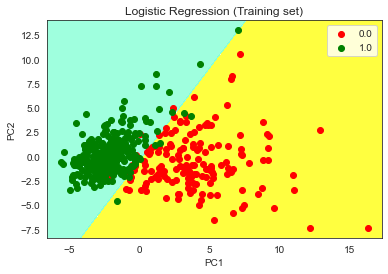

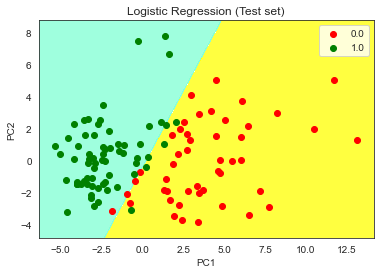

In [52]:
#6 Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#7 Predicting the test set result using
# predict function under LogisticRegression
y_pred = classifier.predict(X_test)

#8 making confusion matrix between
# test set of Y and predicted value.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#9 Predicting the training set
# result through scatter plot
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend() # to show legend
# show scatter plot
plt.show()


#10 Visualising the Test set results through scatter plot
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),
                                                  X2.ravel()]).T).reshape(X1.shape), alpha = 0.75,
             cmap = ListedColormap(('yellow', 'white', 'aquamarine')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
# title for scatter plot
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()

In [86]:
# Using 3 compenents

pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [88]:
# creating dataframe and to csv file 

df_pca3 = pd.DataFrame(X_train, columns = ['PC1', 'PC2', 'PC3'])

# to csv file 
df_pca3.to_csv("pca_3Components.csv", index=False)

In [89]:
df_pca3

,PC1,PC2,PC3
0,-3.039161,1.106670,0.408520
1,-2.282314,0.400452,0.263275
2,-1.084095,-1.995444,-1.193536
3,-2.561100,0.179338,1.085279
4,-2.848305,-1.017616,-0.847290
...,...,...,...
450,0.081023,-3.420671,0.346485
451,6.513019,7.996828,-4.505699
452,-3.170461,0.516009,0.523623
453,-5.611046,-0.538805,4.127448


The main components derived from a PCA analysis can be applied in a variety of ways in the future. Among the frequent uses are:

Data visualisation: It is frequently possible to produce more comprehensible visualisations of the data by condensing the dimensionality of the data to a small number of primary components. Given that it can be challenging to view data in more than three dimensions, this can be very helpful when working with high-dimensional datasets.

Data compression: Since the principle components are ranked according to how much variance in the data they explain, it is frequently possible to drastically reduce the size of the dataset by keeping only the most crucial elements. This may help with more effective data transmission or storage.

Feature selection: It can be advantageous to choose a subset of the most crucial features to include in the model while developing machine learning algorithms. The most crucial features in the data can be found by using the principle components that come from a PCA analysis.
Noise reduction: Projecting the data onto the major components can frequently filter out noise and increase the signal-to-noise ratio in the data since they are orthogonal to one another and capture the most crucial elements in the data.


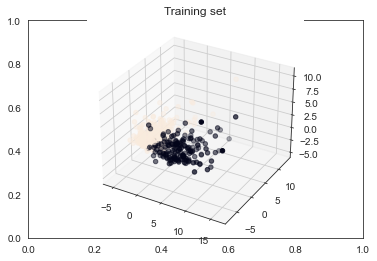

In [65]:
# plotting 3 componnets

from mpl_toolkits.mplot3d import Axes3D

fig =plt.figure()
plt.title("Training set")
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_train[:,0], X_train[:,1], X_train[:,2], c=y_train)

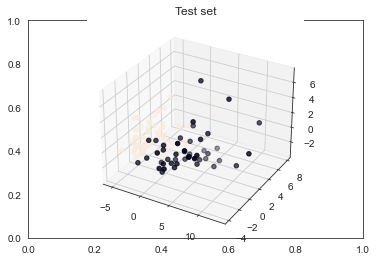

In [64]:
fig =plt.figure()
plt.title("Test set")
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_test[:,0], X_test[:,1], X_test[:,2], c=y_test)

In [71]:
# 95% component 

pca = PCA(n_components = 0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_




In [72]:
pca.n_components_

3

The number of components needed to reach 95% of the explained variance is 3 which we have already plotted above

# Q2 

## Neural network calculations

![1](ForwardPass_Page_1.jpg)

![2](ForwardPass_Page_2.jpg)

![3](ForwardPass_Page_3.jpg)

![4](ForwardPass_Page_4.jpg)

![5](ForwardPass_Page_5.jpg)

![6](ForwardPass_Page_6.jpg)

![7](ForwardPass_Page_7.jpg)

![8](ForwardPass_Page_8.jpg)

![9](ForwardPass_Page_9.jpg)

## Steps to train a simple neural network

- Collect and preprocess the data: this includes data cleansing, formatting the data to have suitable data type and splitting these data into training and test sets.

- Define the model: Next, we must define the neural network architecture. This will include choosing the number of layers, the number of nodes in each layer, and the activation functions to use. Usually for classification problems the architecture is composed of : 
                - A scaling layer
                - Tow perceptron layers
                - A probablistic layer

- Compile the model: After defining the model, you will need to compile it with a loss function, an optimizer, and any metrics that need to be tracked

- Train the model: train the model on the training data. This will involve providing the model with the training data and allowing it to learn the relationships between the input features and the target variables.

- Evaluate the model: After training, we need to evaluate the model's performance on the test data. This will give us a sense of how well the model is able to generalise to unseen data. For example we can switch between LogSoftMax, NLLLoss and Cross Entropy to check the difference in performance.

- Fine-tune the model: Depending on the results of the evaluation, we may want to adjust the model's architecture or hyperparameters to improve its performance. This process is known as fine-tuning.

- Make predictions: Finally, we can use the trained model to make predictions on new data.






## Code example for train and testing a simple network

`from keras.models import Sequential`  
`from keras.layers import Dense`

### define the model
`model = Sequential()`  
`model.add(Dense(10, input_dim=8, activation='relu'))`  
`model.add(Dense(1, activation='sigmoid'))`  

### compile the model
`model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])`  

### fit the model to the training data
`model.fit(X_train, y_train, epochs=10, batch_size=32)`  

### evaluate the model on the test data
`loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)`  
`print('Test loss:', loss)`  
`print('Test accuracy:', accuracy)`  


The input features and target variables for the training data in this example are X train and y train, while the input features and target variables for the test data are X test and y test. The model consists of two layers: an output layer with one node and a hidden layer with ten nodes. The output layer makes use of the sigmoid activation function, whereas the hidden layer makes use of the relu activation function. The binary crossentropy loss function and Adam optimizer are used in the model's construction, and it is trained using stochastic gradient descent with a batch size of 32 on the training set of data. The model is then assessed using the test data, and the accuracy and loss are printed.


# Q3

In [27]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import numpy as np

# Laoding the digits dataset
digits = datasets.load_digits()

print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


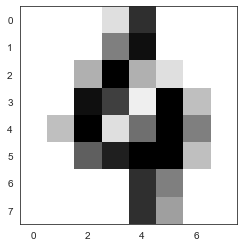

In [28]:
#Viewing the digits within the dataset.
# The image appears to show a 4 but we can see if the model can predict this
plt.imshow(digits.images[100], cmap=plt.cm.gray_r, interpolation='nearest')

In [13]:
# Splitting the dataset into test and train sets

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=42)

In [36]:
# Using the Support Vector Machine (SVM) classifier to classify the digits. 
# First training the classifier on the training set then test it on the testinig set

# Import the SVM classifier
from sklearn.svm import SVC

# Create an SVM classifier
clf = SVC(gamma='auto')

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Test the classifier on the testing set
accuracy = clf.score(X_test, y_test)

print("Test set accuracy: {:.2f}".format(accuracy))


Test set accuracy: 0.52


In [37]:
## Using RandomForest classifier

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy))

Test set accuracy: 0.98


In [16]:
# Creating the KNN model to use with n equal to 4 (chosen at random by default)
# General rule for default n is to use odd n if no of variables is even and vice versa. 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

# Fitting the knn model with the feature and target data created previously
knn.fit(X_train, np.ravel(y_train))

# getting the predicition values for whole dataset using n=4 
y_pred4 = knn.predict(X_test)

# Check the accuracy score of using n=4 
accuracy_score4 = round(metrics.accuracy_score(y_test, y_pred4), 2)

print("Test set accuracy: {:.2f}".format(accuracy_score4))

Test set accuracy: 0.99


We can see in these two examples that the KNN model is much superior than the SVM and RandomForest by a significant margin

In [17]:
#Tuning the KNN model to find best k value 

k_range = range(3, 25)

accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, np.ravel(y_train))
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

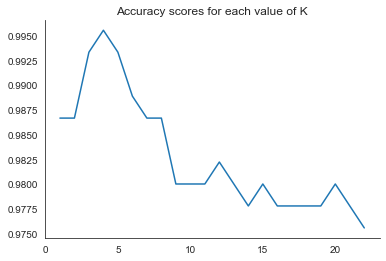

In [21]:
import seaborn as sns
sns.set_style("white")
#sns.set(rc={'figure.figsize':(20, 10)})
sns.lineplot(x=range(1, 23), y=accuracy_scores).set(title="Accuracy scores for each value of K")

sns.despine(top=True, right=True);

In [18]:
print("The best value of K seems to be", accuracy_scores.index(max(accuracy_scores))+1)


The best value of K seems to be 4


Given we used the value of 4 in our KNN model earlier this doesnt need to change. 

C:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


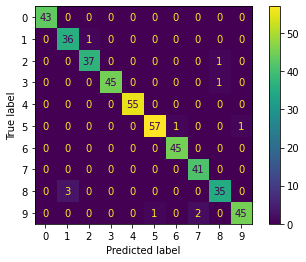

In [19]:
# Evaluating the model 
## Running a confustion matrix on the knn model. 

metrics.plot_confusion_matrix(knn, X_test, y_test);

CM = metrics.confusion_matrix(y_test, y_pred)

We can see from the above confusion matrix that the digits were more or less correctly predicted with very few outliers. 
This is a model we can rely upon especially given its 99% accuracy rate. 

In [25]:
# Verification of the model using a classification report 

print(
    f"Classification report for {knn}:\n"
      f"{metrics.classification_report(y_test, y_pred4)}:\n")

Classification report for KNeighborsClassifier(n_neighbors=24):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        37
           2       1.00      1.00      1.00        38
           3       0.98      1.00      0.99        46
           4       0.98      0.98      0.98        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        41
           8       0.97      0.97      0.97        38
           9       1.00      0.92      0.96        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450
:



The F1 scores for this model is optimal giving it is very close to 1. In addition to the f1 score we can see that the precision and recall scores and similar particularly for where n classifiers is 4, which is what was used in the model, this indicates that there are not so many false positives and false negatives in the model predictions

# References

Principal component analysis (2023) Wikipedia. Wikimedia Foundation. Available at: https://en.wikipedia.org/wiki/Principal_component_analysis (Accessed: January 6, 2023). 

2.5. decomposing signals in components (matrix factorization problems) (no date) scikit. Available at: https://scikit-learn.org/stable/modules/decomposition.html#pca (Accessed: January 6, 2023). 

PC 
